<a href="https://colab.research.google.com/github/prog815/test/blob/master/%D1%81%D0%BE%D0%B1%D0%B8%D1%80%D0%B0%D0%B5%D0%BC%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C%20%D0%BF%D0%BE%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%BC%D1%83%20%D0%90%D0%9F%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключаем библиотеки

In [50]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np


# Готовим данные

In [51]:
smpls_cnt = 10000

map_x = 5
map_y = 7
map_cnt = 12

X_maps = np.random.randn(smpls_cnt,map_y,map_x,map_cnt) # номер карты последним индексом
X_date = np.random.rand(smpls_cnt,2)*2-1
Y = np.random.rand(smpls_cnt)

# Собираем модель

In [55]:
inputs_maps = keras.Input(shape=(map_y,map_x,map_cnt),name='inputs_maps')
inputs_date = keras.Input(shape=(2,),name='inputs_date')

x_maps = keras.layers.Conv2D(30,3,activation=tf.nn.relu)(inputs_maps)
x_maps = keras.layers.GlobalMaxPool2D()(x_maps)

x = keras.layers.concatenate([x_maps,inputs_date])

x = keras.layers.Dense(10,activation=tf.nn.relu)(x)

outputs = keras.layers.Dense(1)(x)

model = keras.Model(inputs=[inputs_maps,inputs_date],outputs=outputs)

model.compile(loss=keras.losses.MAE)

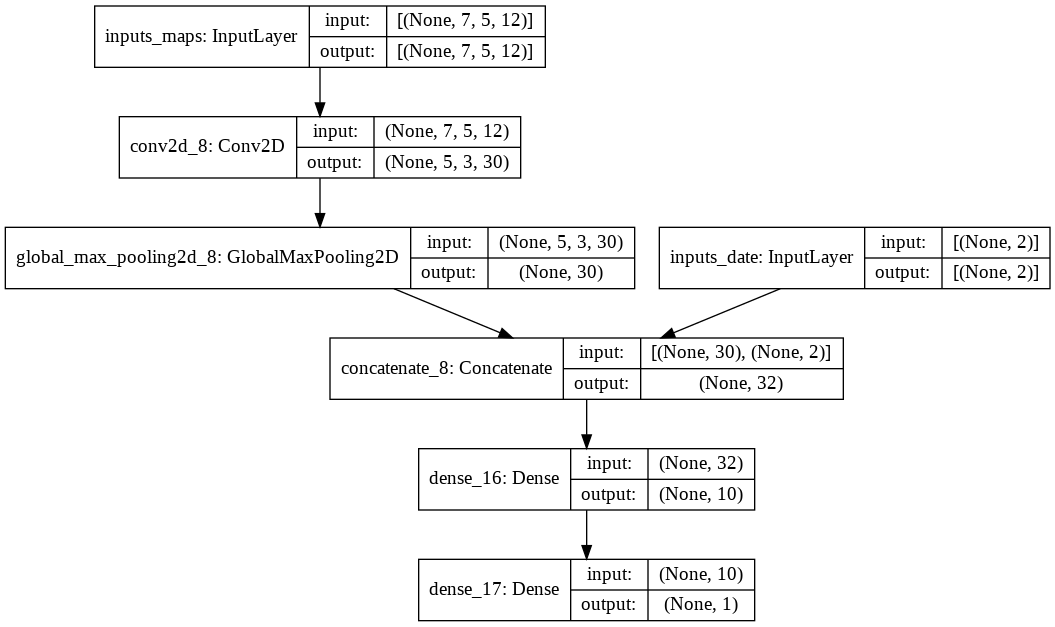

In [53]:
keras.utils.plot_model(model,show_shapes=True)

# Учим модель

In [56]:
model.fit(x={'inputs_maps':X_maps,'inputs_date':X_date},y=Y,epochs=10,validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3599 - val_loss: 0.2898
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2566 - val_loss: 0.2725
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2396 - val_loss: 0.2737
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2303 - val_loss: 0.2721
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2238 - val_loss: 0.2719
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2169 - val_loss: 0.2782
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2112 - val_loss: 0.2779
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2058 - val_loss: 0.2800
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2021 - val_loss: 0.2790
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.1986 - val_loss: 0.2841

# Тестируем модель